# Introduction to Data Science – Homework 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 5, 11:59pm.

This homework is designed to reinforce the skills we covered in the last week including various descriptive statistics. Make sure to go through the lectures again in case you have any trouble.

## Your Data
Fill out the following information: 

*First Name: Andreas
*Last Name: Martinson
*E-mail: andreas.martinson@utah.edu
*UID: u1291396

## Part 1: Vector data

We first will work with a vector of monthly average temperatures for Snowbird, UT, which we downloaded from [NOAA](https://www.ncdc.noaa.gov/). The data is included in this repository in the file `snowbwird.csv`.

The data is stored in the CSV format, which is a simple textfile with 'Comma Separated Values'.
To load the data, we use the read_csv function from the pandas library. The following code reads the file and stores it in a vector:

In [35]:
# import the csv library
import csv
# import the math library we'll use later
import math
# import the pandas library
import pandas as pd

# read in and print the data
data = pd.read_csv("snowbird.csv")
print(data)

# define vectors of interest
temperature_vector = data["TAVG"].tolist()
precipitation_vector = data["PRCP"].tolist()

# print the vector to see if it worked
print (temperature_vector)
print (precipitation_vector)

       DATE  PRCP  TAVG
0   2010-01  7.39  27.5
1   2010-02  2.99  23.8
2   2010-03  5.88  29.0
3   2010-04  9.69  33.0
4   2010-05  6.30  37.2
..      ...   ...   ...
75  2016-04  7.19  38.0
76  2016-05  5.40  42.8
77  2016-06  1.20  59.2
78  2016-07  0.00  62.9
79  2016-08  1.89  60.4

[80 rows x 3 columns]
[27.5, 23.8, 29.0, 33.0, 37.2, 51.5, 61.7, 58.0, 54.1, 42.4, 27.2, 27.7, 23.7, 22.0, 28.5, 30.4, 38.6, 50.1, 60.4, 62.2, 53.8, 40.7, 28.9, 26.0, 27.4, 23.4, 34.1, 38.4, 44.8, 56.3, 62.3, 62.8, 53.8, 41.0, 35.3, 22.5, 23.7, 21.8, 31.2, 32.3, 44.0, 56.6, 62.9, 60.9, 50.4, 37.7, 33.9, 22.6, 27.2, 26.0, 31.1, 34.9, 45.6, 52.4, 63.5, 56.0, 53.8, 44.8, 30.8, 27.1, 31.5, 31.4, 36.6, 36.0, 42.6, 59.6, 58.4, 59.9, 55.2, 45.2, 27.6, 22.8, 25.1, 30.4, 31.7, 38.0, 42.8, 59.2, 62.9, 60.4]
[7.39, 2.99, 5.88, 9.69, 6.3, 2.2, 1.0, 3.09, 1.09, 7.8, 9.7, 12.89, 3.4, 7.2, 8.09, 13.79, 9.99, 2.2, 0.6, 2.3, 2.29, 5.2, 4.69, 1.9, 6.6, 5.6, 5.4, 5.69, 2.6, 0.0, 2.09, 0.59, 2.2, 3.2, 6.19, 7.7, 4.4, 2.8,

We'll next use descriptive statistics to analyze the data in `temperature_vector`.

In this problem, we'll do calculations that are also available in NumPy. For the purpose of this homework, however, **we want you to implement the solutions using standard python functionality and the math library, and then check your results using NumPy**. 

See the the [NumPy library](http://docs.scipy.org/doc/numpy-1.11.0/reference/routines.statistics.html) documentation and include the checks as a separate code cell. 

### Task 1.1: Calculate the Mean of a Vector

Write a function that calculates and returns the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean) of a vector that you pass into it. 

Pass the temperature and precipitaton vector into this function and print the result. Provide a written interpretation of your results (e.g., "The mean temperature for Snowbird is XXX degrees Fahrenheit. The mean precipitation is XXX inches.")

In [103]:
arithmetic_mean = lambda x: sum(x)/len(x)

print("The mean temperature for Snowbird is {:.0f} degrees Fahrenheit. The mean precipitation is {:.0f} inches.".format(arithmetic_mean(temperature_vector), arithmetic_mean(precipitation_vector)))

The mean temperature for Snowbird is 41 degrees Fahrenheit. The mean precipitation is 4 inches.


In [24]:
import numpy as np

print(np.mean(temperature_vector))
print(np.mean(precipitation_vector))

40.8625
4.376250000000001


**Your Interpretation:** The mean temperature for Snowbird is 41 degrees Fahrenheit. The mean precipitation is 4 inches.

### Task 1.2: Calculate the Median of a Vector
Write a function that calculates and returns the [median](https://en.wikipedia.org/wiki/Median) of a vector. Pass the temperature vector into this function and print the result. Make sure that your function works for both vectors with an even and odd number of elements. In the case of an even number of elements, use the mean of the two middle values. Provide a written interpretation of your results.

Hint: the [`sorted()`](https://docs.python.org/3/library/functions.html#sorted) function might be helpful for this.

In [34]:
def my_median(vector):
    middle = round(len(vector)/2)
    return vector[middle] if len(vector) % 2 != 0 else (sorted(vector)[middle] + sorted(vector)[middle -1])/2

print(my_median(temperature_vector))
print(my_median(precipitation_vector))

37.85
4.045


In [28]:
print(np.median(temperature_vector))
print(np.median(precipitation_vector))

37.85
4.045


**Your Interpretation:** The median temperature for Snowbird is 38 degrees Fahrenheit. This is lower than the mean, which indicates the values above 38 are of greater magnitude than those below it and could even possibly indicate an outlier. The median precipitation is 4.045 inches, which was slightly less than the mean. Again, this could possibly indicate outliers above 4.045 or just numbers that are greater in magnitude than those below 4.045.

### Task 1.3: Calculate the Standard Deviation of a Vector

Write a function that calculates and returns the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of a vector. Pass the temperature and precipitation vectors into this function and print the result. Provide a written interpretation of your results. Is the standard deviation high? Why, Why not? 

The standard deviation is the square root of the average of the squared deviations from the mean, i.e.,

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} {{(x_i - \mu)}^2} }$$

where $\mu$ is the mean of the vector. Hint: use your mean function to calculate it.

Hint: the `sqrt()` function from the [`math library`](https://docs.python.org/3/library/math.html) might be helpful for this. If you use a separate file you need to load the library as we did in Part 1 to read in the data. The import looks like this:

In [168]:
def my_sd(vector):
    return math.sqrt(sum([(x - arithmetic_mean(vector))**2 for x in vector]) / len(vector))
    
print(my_sd(temperature_vector))
print(my_sd(precipitation_vector))

13.551876023267035
2.8204345299084683


In [45]:
print(np.std(temperature_vector))
print(np.std(precipitation_vector))

print('Coefficient of Variation: ', np.std(temperature_vector)/np.mean(temperature_vector))
print('Coefficient of Variation: ', np.std(precipitation_vector)/np.mean(precipitation_vector))

13.551876023267036
2.820434529908468
Coefficient of Variation:  0.33164578827205965
Coefficient of Variation:  0.6444866106617464


**Your Interpretation:** Without plotting the standard deviations, you can look at how the standard deviations relate to the mean. This is called the Coefficient of Variation and you can see that the precipitation is more variable than the temperature. Regarding if these are considered 'high' standard deviations, I don't have much to base it on, but according to a quick google search, a CV over 1 is considered high and a CV below 1 is considered low. So I would say these standard deviations are low compared to other distributions.

### Task 1.4: Histogram

Write a function that takes a vector and an integer `b` and calculates a [histogram](https://en.wikipedia.org/wiki/Histogram) with `b` bins. The function should return an array containing two arrays. The first should be the counts for each bin, the second should contain the borders of the bins.

For `b=5` for the temperature vector, your output should look like this: 

`[[22, 20, 11, 8, 19], [21.8, 30.14, 38.480000000000004, 46.82, 55.16, 63.5]]`

Here, the first array gives the size of these bins, the second defines the bands. That is, the first band from 21.8-30.14 has 22 entries, the second, from 30.14-38.48 has 20 entries, etc. 


Calculate the histogram for precipitation and temperature. Once you have the calculated bins and values, plot the histogram for precipitaion and temperature. Provide a written interpretation of your results. Comment on the shape of each histogram; is it unimodal or bimodal? Is the distribution skewed (if so, in which direction)?

[[22, 20, 11, 8, 19], [21.8, 30.14, 38.480000000000004, 46.82, 55.16, 63.5]]
[[27, 28, 19, 4, 2], [0.0, 2.758, 5.516, 8.274000000000001, 11.032, 13.79]]


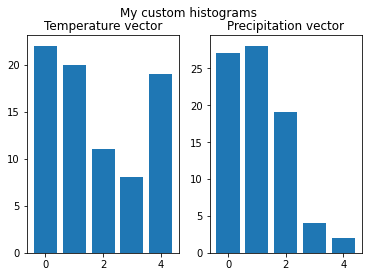

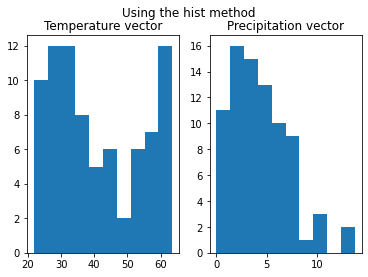

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def hist_output(vector, b):
    """Creates bins for a histogram and counts the number of data points between those bins"""
    
    # Create the lists for the output
    counts = []
    for i in range(b):
        counts.append(0)
    
    bin_dist = []
    
    # Create an array
    v = np.array(vector)
    
    # Create the bins
    diff = max(v) - min(v)
    
    for i in range(b+1):
        bin_dist.append(min(v) + (diff/(b) * i))
        
#     bin_dist = [i for i in np.linspace(min(vector),max(vector),b+1,endpoint=True)] <-- The numpy way of doing what I did above
    
    # Count the amounts for each bin
    for i in range(len(bin_dist)-1):
        upper = bin_dist[i+1]
        lower = bin_dist[i]
        for x in v:
            if x>=lower:
                if x<upper:
                    counts[i] +=1
                
#         counts.append(sum(np.logical_and(v>=lower, v<upper))) <-- The numpy way of doing what I did above

    # Add the straggler at the end that got excluded
    counts[-1] += 1
    print([counts, bin_dist])
    return [counts, bin_dist]

temp_data = hist_output(temperature_vector,5)[0]
rain_data = hist_output(precipitation_vector,5)[0]

fig, ax = plt.subplots(1,2)
fig.suptitle('My custom histograms')

ax[0].bar(range(len(temp_data)), temp_data)
ax[0].set(title='Temperature vector')

ax[1].bar(range(len(rain_data)), rain_data)
ax[1].set(title='Precipitation vector')
plt.show()

fig, ax = plt.subplots(1,2)
fig.suptitle('Using the hist method')

ax[0].set(title='Temperature vector')
ax[0].hist(temperature_vector, bins=10)

ax[1].set(title='Precipitation vector')
ax[1].hist(precipitation_vector, bins=10)

plt.show()

**Your interpretation:** 

It looks like both are right skewed, which means that the tails are to the right


## Part 2: Working with Matrices

For the second part of the homework, we are going to work with matrices. The [dataset we will use](https://www.wunderground.com/history/airport/KSLC/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=) contains different properties of the weather in Salt Lake City for 2015 (temperature, humidity, sea level, ...). It is stored in the file [`SLC_2015.csv`](SLC_2015.csv) in this repository.

We first read the data from the file and store it in a nested python array (`weather_matrix`). A nested python array is an array, where each element is an array itself. Here is a simple example: 

In [100]:
arr1 = [1,2,3]
arr2 = ['a', 'b', 'c']

nestedArr = [arr1, arr2]
nestedArr

[[1, 2, 3], ['a', 'b', 'c']]

We provide you with the import code, which writes the data into the nested list `temperature_matrix`. The list contains one list for each month, which, in turn, contains the mean temperature of every day of that month. 

In [101]:
# initialize the 12 arrays for the months
temperature_matrix = [[] for i in range(12)]

# open the file and append the values of the last column to the array
with open('SLC_2015.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    # get rid of the header
    next(filereader)
    for row in filereader:
        month = int(row[0].split('/')[0])
        mean_temp = int(row[2])
        temperature_matrix[month-1].append(mean_temp)

print(temperature_matrix)

# the mean tempertarure on August 23. Note the index offset:
print("Mean temp on August 23: " + str(temperature_matrix[7][22]))

[[15, 19, 26, 28, 37, 38, 38, 36, 35, 31, 39, 36, 35, 30, 31, 31, 37, 44, 40, 35, 31, 31, 31, 33, 42, 41, 44, 42, 36, 40, 39], [39, 49, 50, 50, 53, 57, 60, 53, 55, 45, 43, 47, 46, 48, 43, 40, 38, 44, 47, 44, 39, 33, 31, 35, 44, 35, 37, 36], [40, 37, 34, 33, 39, 43, 45, 45, 46, 50, 54, 50, 51, 56, 62, 63, 61, 53, 47, 53, 57, 54, 52, 47, 42, 48, 56, 62, 53, 57, 63], [46, 44, 44, 54, 60, 50, 52, 46, 49, 53, 58, 50, 57, 56, 33, 44, 50, 54, 56, 56, 60, 61, 61, 59, 51, 46, 50, 57, 65, 63], [63, 71, 68, 67, 62, 59, 58, 57, 49, 53, 59, 68, 65, 65, 53, 48, 56, 58, 55, 59, 58, 58, 55, 57, 62, 59, 61, 61, 64, 71, 76], [80, 68, 69, 68, 69, 70, 66, 73, 77, 78, 72, 74, 75, 76, 81, 77, 78, 83, 83, 78, 81, 78, 78, 83, 82, 84, 87, 88, 91, 89], [87, 87, 87, 89, 79, 79, 76, 75, 73, 72, 77, 79, 81, 77, 80, 80, 79, 74, 74, 73, 76, 77, 75, 78, 78, 84, 77, 66, 70, 76, 79], [80, 79, 69, 76, 82, 74, 76, 69, 72, 79, 83, 81, 83, 88, 83, 79, 77, 72, 74, 76, 81, 74, 76, 84, 85, 78, 77, 80, 85, 82, 75], [82, 83, 82

We will next compute the same descriptive statistics as in Part 1 using the nested array `temperature_matrix`. 

In this problem, **we again want you to implement the solutions using standard python functionality and the math library**. We recommend you check your results using NumPy.

**Note:** Since the lists in the matrix are of varying lengths (28 to 31 days) many of the standard NumPy functions won't work directly.

### Task 2.1: Calculates the mean of a whole matrix

Write a function that calculates the mean of a matrix. For this version calculate the mean over all elements in the matrix as if it was one large vector. 
Pass in the matrix with the weather data and return the result. Provide a written interpretation of your results.
Can you use your function from Part 1 and get a valid result?

In [159]:
def mean_matrix(matrix):
    """ Calculate the mean of a 2D matrix"""

    # Checking if the function from part 1 works
    try:
        arithmetic_mean(matrix) 
    except TypeError:
        print('I cannot use my function from part 1')
        return sum([sum(i) for i in temperature_matrix])/sum([len(i) for i in matrix])
    
print('The mean is {} for the entire matrix'.format(mean_matrix(temperature_matrix)))

I cannot use my function from part 1
The mean is 56.76712328767123 for the entire matrix


In [155]:
ls = []
for i in temperature_matrix:
    for x in i:
        ls.append(x)
        
np.mean(ls)

56.76712328767123

### Task 2.2:  Calculate the mean of each vector of a matrix

Write a function that calculates the mean temperature of each month and returns an array with the means for each row. Provide a written interpretation of your results. Can you use the function you implemented in Part 1 here efficiently? If so, use it.

In [167]:
# Mean function from part 1
arithmetic_mean = lambda x: sum(x)/len(x)

def mean_matrix_month(matrix):
    ls = []
    for i in matrix:
        ls.append(arithmetic_mean(i))
    return ls

print('I was able to use my function from part 1. Here are the means for each row appended into a list: \n\n{}'\
      .format(mean_matrix_month(temperature_matrix)))


I was able to use my function from part 1. Here are the means for each row appended into a list: 

[34.54838709677419, 44.32142857142857, 50.096774193548384, 52.833333333333336, 60.483870967741936, 77.86666666666666, 77.87096774193549, 78.35483870967742, 71.43333333333334, 61.16129032258065, 39.96666666666667, 31.548387096774192]


### Task 2.3:  Calculate the median of a whole matrix

Write a function that calculates and returns the median of a matrix over all values (independent from which row they are coming) and returns it. Provide a written interpretation of your results. Can you use your function from Part 1 and get a valid result?

In [163]:
# Median function from part 1
def my_median(vector):
    middle = round(len(vector)/2)
    return vector[middle] if len(vector) % 2 != 0 else (sorted(vector)[middle] + sorted(vector)[middle -1])/2

# My new median function
def median_matrix(matrix):
    ls = []
    for row in matrix:
        for x in row:
            ls.append(x)
    return my_median(ls)
            
print('I was able to use my median function from part 1. The median for the temperature matrix is: {}'\
     .format(median_matrix(temperature_matrix)))

I was able to use my median function from part 1. The median for the temperature matrix is: 87


In [164]:
np.median(median_matrix(temperature_matrix))

87.0

### Task 2.4: Calculate the median of each vector of a matrix

Write a function that calculates the median of each sub array (i.e. each row in the temperature_matrix) in the matrix and returns an array of medians (one entry for each row). To do so, use the function you implemented in Part 1. Provide a written interpretation of your results. 

In [166]:
def median_matrix_month(matrix):
    ls = []
    for i in matrix:
        ls.append(my_median(i))
    return ls

print('I was able to use my function from part 1. Here are the medians for each row appended into a list: \n\n{}'\
      .format(median_matrix_month(temperature_matrix)))

I was able to use my function from part 1. Here are the medians for each row appended into a list: 

[37, 44.0, 61, 53.5, 56, 78.0, 79, 77, 73.0, 69, 40.0, 23]


### Task 2.5: Calculate the standard deviation of a whole matrix

Write a function that calculates the standard deviation of a matrix over all values in the matrix (ignoring from which row they were coming) and returns it. Can you use your function from Part 1 and get a valid result? Provide a written interpretation of your results. 

In [169]:
# My standard deviation matrix function
def sd_matrix(matrix):
    ls = []
    for row in matrix:
        for x in row:
            ls.append(x)
    return my_sd(ls)

print('I was able to use my median function from part 1. The standard deviation for the temperature matrix is: {}'\
      .format(sd_matrix(temperature_matrix)))

I was able to use my median function from part 1. The standard deviation for the temperature matrix is: 17.908994103709954


In [172]:
ls = []
for row in temperature_matrix:
    for x in row:
        ls.append(x)
np.std(ls)

17.908994103709954

### Task 2.6: Calculate the standard deviation of each vector of a matrix

Write a function that calculates the standard deviation of each array in the matrix and returns an array of standard deviations (one standard deviation for each row). To do so, use the function you implemented in Part 1. 
Pass in the matrix with the temperature data and return the result. Provide a written interpretation of your results - is the standard deviation consistent across the seasons? 

In [179]:
def sd_matrix_month(matrix):
    ls = []
    for i in matrix:
        ls.append(my_sd(i))
    return ls

print('I was able to use my function from part 1. Here are the standard deviations for each row appended into a list: \n\n{}'\
    .format(sd_matrix_month(temperature_matrix)))

I was able to use my function from part 1. Here are the standard deviations for each row appended into a list: 

[6.5047809200539595, 7.343868051591318, 8.263229231729458, 6.923791511078947, 6.272679973334109, 6.535713852025312, 5.020872148142359, 4.666617114845193, 7.552850823070421, 6.937959048194395, 8.715822138820615, 8.96890222245524]


## Part 3: Poisson distribution 

In class, we looked at [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution) and [binomial](https://en.wikipedia.org/wiki/Binomial_distribution) discrete random variables. Another example of a discrete random variable is a *Poisson random variable*. 

Read the [wikipedia article on the Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

### Part 3.1. Descriptive statistics

Describe what a Poisson random variable is. What is the parameter, $\lambda$? What is the min, max, mean, and variance of a Poisson random variable? 

**Your description:** 

$\lambda$ is the average number of events per time period, but also its variance. The maximum would be the number of occurrences at the peak of the poisson distribution and the minimum would be 0 events.

### Part 3.2. Example 

Give an example of an application that is described by a Poisson random variable.

**Your description:** 

Earthquakes in Utah could be described by a Poisson random variable. The earthquakes don't happen very often and they are discrete. 

### Part 3.3. Probability mass function

For the parameter $\lambda = 2$, plot the probability mass function (you may use scipy). 

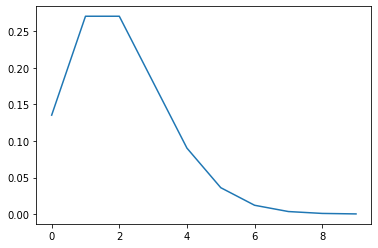

In [191]:
from scipy.stats import poisson

x = np.arange(0,10)
plt.plot(x, poisson.pmf(x,2))
plt.show()

### Part 3.4. Poission sampling

Write python code that takes 1000 samples from the Poisson distribution with parameter $\lambda = 2$. Make a histogram of the samples and compute the sample mean and variance. How does the histogram compare to the probability mass function?

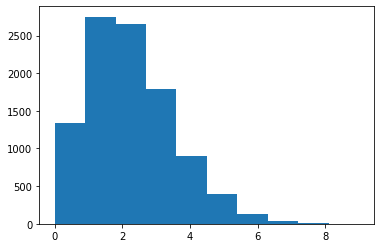

Sample mean: 2.0127 
Sample variance: 2.04053871


In [195]:
from numpy import random

dat = random.poisson(2,10000)
plt.hist(dat)
plt.show()

print('Sample mean: {} \nSample variance: {}'.format(np.mean(dat), np.var(dat)))

**Your description:** 

It looks identical to the probability mass function